In [1]:
#To get started, let’s first import the packages we are going to need for our project:

In [27]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier



from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output


In [28]:
"""Now we are ready to import our data and take a look at it to gain a better understanding o
f what it looks like:"""


'Now we are ready to import our data and take a look at it to gain a better understanding o\nf what it looks like:'

In [29]:
train = pd.read_csv(r"D:\python_code\data\classification\ames_house_prices\train.csv")
test = pd.read_csv(r"D:\python_code\data\classification\ames_house_prices\test.csv")



In [30]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


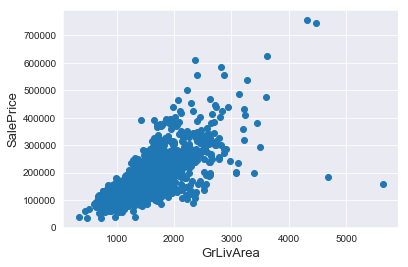

In [31]:
#檢查outlier
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

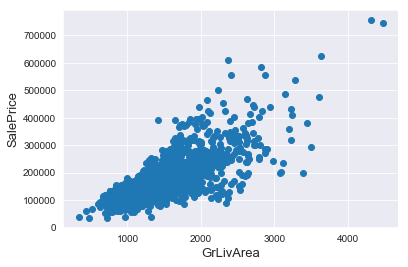

In [32]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



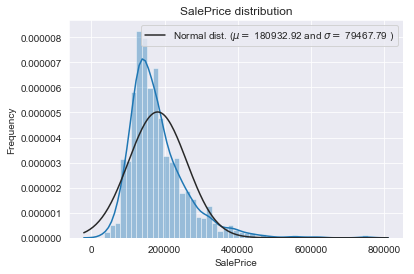

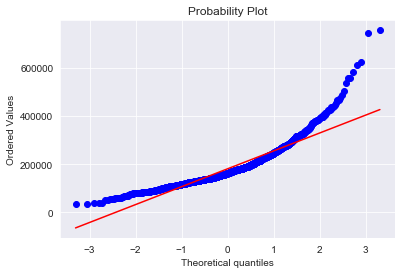

In [33]:
#view target dist.
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



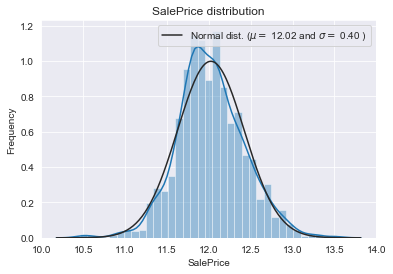

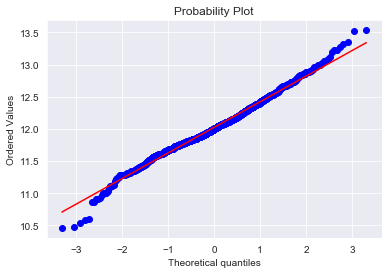

In [34]:
#Log-transformation of the target variable
#可看到取log後，變得較為接近常態分配
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [35]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("df size is : {}".format(df.shape))

df size is : (2917, 79)


C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


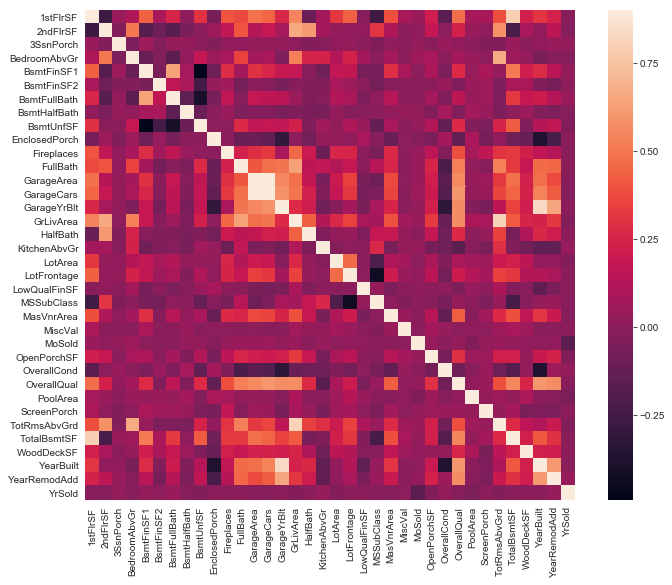

In [36]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [37]:
num = df.isna().sum()
print(num)

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2719
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage       486
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2812
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

In [38]:
df.drop(['Alley','MiscFeature','PoolQC'],axis=1, inplace=True)

In [39]:
num = df.isna().sum()
print(num)

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
                 ... 
LotArea             0
LotConfig           0
LotFrontage       486
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQua

In [40]:
"""因為數值型資料missing value會該col有str and numeric, label encoder無法處理該種col，所以要先處理
數值型missing data"""
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
                  ...   
LotArea            int64
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object


In [41]:
df.describe

<bound method NDFrame.describe of       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0             3     1Fam       TA   
1         1262         0          0             3     1Fam       TA   
2          920       866          0             3     1Fam       TA   
3          961       756          0             3     1Fam       Gd   
4         1145      1053          0             4     1Fam       TA   
5          796       566        320             1     1Fam       TA   
6         1694         0          0             3     1Fam       TA   
7         1107       983          0             3     1Fam       TA   
8         1022       752          0             2     1Fam       TA   
9         1077         0          0             2   2fmCon       TA   
10        1040         0          0             3     1Fam       TA   
11        1182      1142          0             4     1Fam       TA   
12         912         0          0        

In [42]:
#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [43]:
#We need first to extract the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [44]:
categorical_cols

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities',
 'YrSold']

In [45]:
#轉換str numeric col全為str
le = LabelEncoder()
for strcol in categorical_cols:
    df[strcol] = le.fit_transform(df[strcol].astype(str))
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)
df.fillna(0, inplace=True)



In [46]:
#Adding one more important feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
categorical_feature_mask = df.dtypes==object

In [47]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Utilities,33.962
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
Condition2,12.341
LowQualFinSF,12.085
Heating,12.075
3SsnPorch,11.372
RoofMatl,8.723
LandSlope,4.973


In [54]:
df.shape

(2917, 77)

In [48]:
#Box Cox Transformation of (highly) skewed features

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
    
#df[skewed_features] = np.log1p(df[skewed_features])

There are 77 skewed numerical features to Box Cox transform


In [55]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
onehot_enc = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [56]:
# apply OneHotEncoder on categorical feature columns
df_ohe= onehot_enc.fit_transform(df) # It returns an numpy array

C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [57]:
train = df_ohe[:ntrain]
test = df_ohe[ntrain:]

In [58]:
df_ohe.shape

(2917, 77)

In [59]:


#X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.20, random_state=36)

In [62]:
for i in train,y_train:
    print("shape is ",i.shape)

shape is  (1458, 77)
shape is  (1458,)


In [74]:
#It is time now to define a few first level models for our stacked generalization.
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, \
                             ExtraTreesRegressor,  AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from vecstack import stacking,StackingTransformer


In [64]:
# Caution! All estimators and parameter values are just 
# demonstrational and shouldn't be considered as recommended.

# This is list of tuples
# Each tuple contains arbitrary unique name and estimator object
estimators_L1 = [

    ('ls',Lasso(alpha =0.0005, random_state=1)),

    ('krr',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)),
    ('et', ExtraTreesRegressor(random_state=0, n_jobs=-1, 
                               n_estimators=100, max_depth=3)),
    ('rf', RandomForestRegressor(random_state=0, n_jobs=-1, 
                                 n_estimators=100, max_depth=3)),
    ('gb',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)),
    ('gb1',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)),
    ('gb2',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)),
    ('gb3',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=7, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)),

    ('lgb_regressor',lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)),
    ('lgb_regressor1',lgb.LGBMRegressor(objective='regression', max_depth=2,num_leaves=4,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)),
    ('lgb_regressor2',lgb.LGBMRegressor(objective='regression', max_depth=3,num_leaves=8,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)),
    ('lgb_regressor3',lgb.LGBMRegressor(objective='regression', max_depth=3,num_leaves=16,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)),
    ('ada',AdaBoostRegressor(random_state=0, n_estimators=100))
    ]
"""('xgb_regressor',xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                         learning_rate=0.05, max_depth=3, 
                         min_child_weight=1.7817, n_estimators=2200,
                         reg_alpha=0.4640, reg_lambda=0.8571,
                         subsample=0.5213, silent=1,
                         random_state =7, nthread = -1)),"""
#('knnr',KNeighborsRegressor(n_neighbors=5)),
#('sgdr',SGDRegressor(max_iter=1000, tol=1e-3)),
#('svr',SVR(gamma='scale', C=1.0, epsilon=0.2)),
#('enet',ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),

"('xgb_regressor',xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                         learning_rate=0.05, max_depth=3, \n                         min_child_weight=1.7817, n_estimators=2200,\n                         reg_alpha=0.4640, reg_lambda=0.8571,\n                         subsample=0.5213, silent=1,\n                         random_state =7, nthread = -1)),"

In [77]:
stack = StackingTransformer(estimators=estimators_L1,   # base estimators
                            regression=True,            # regression task (if you need 
                                                        #     classification - set to False)
                            variant='A',                # oof for train set, predict test 
                                                        #     set in each fold and find mean
                            metric=mean_squared_error, # metric: callable
                            n_folds=4,                  # number of folds
                            shuffle=True,               # shuffle the data
                            random_state=0,             # ensure reproducibility
                            verbose=2)                  # print all info

In [78]:
stack = stack.fit(train, y_train)



task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [13]

estimator  0: [ls: Lasso]
    fold  0:  [0.01318997]
    fold  1:  [0.02039907]
    fold  2:  [0.01322030]
    fold  3:  [0.01351683]
    ----
    MEAN:     [0.01508154] + [0.00307273]

estimator  1: [krr: KernelRidge]
    fold  0:  [0.01529006]
    fold  1:  [0.02198719]
    fold  2:  [0.01468180]
    fold  3:  [0.01572615]
    ----
    MEAN:     [0.01692130] + [0.00294822]

estimator  2: [et: ExtraTreesRegressor]
    fold  0:  [0.03312246]
    fold  1:  [0.03392143]
    fold  2:  [0.03722094]
    fold  3:  [0.02824939]
    ----
    MEAN:     [0.03312856] + [0.00320868]

estimator  3: [rf: RandomForestRegressor]
    fold  0:  [0.03085690]
    fold  1:  [0.03497605]
    fold  2:  [0.03591280]
    fold  3:  [0.02969905]
    ----
    MEAN:     [0.03286120] + [0.00263634]

estimator  4: [gb: GradientBoostingRegressor]
    fold  0:  [0.01210211]
    fold  1:  [0.01953483]
    fold  2:  [0.01

In [79]:
S_train = stack.transform(train)
S_test = stack.transform(test)

Train set was detected.
Transforming...

estimator  0: [ls: Lasso]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [krr: KernelRidge]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [et: ExtraTreesRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  3: [rf: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  4: [gb: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  5: [gb1: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  

In [81]:
# Initialize 2nd level estimator
final_estimator =xgb.XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                               n_estimators=100, max_depth=3)

# Fit
final_estimator = final_estimator.fit(S_train, y_train)

# Predict
y_pred = final_estimator.predict(S_test)

# Final prediction score


[00:47:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
y_pred.shape

(1459,)

In [87]:
y_rf = np.expm1(y_pred)

In [88]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_rf
sub.to_csv('submission.csv',index=False)

In [ ]:
#Validation function
"""
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


#pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
"""

In [47]:
"""
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   
    
    

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




#Stacking averaged Models Class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
"""

'\nclass AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):\n    def __init__(self, models):\n        self.models = models\n        \n    # we define clones of the original models to fit the data in\n    def fit(self, X, y):\n        self.models_ = [clone(x) for x in self.models]\n        \n        # Train cloned base models\n        for model in self.models_:\n            model.fit(X, y)\n\n        return self\n    \n    #Now we do the predictions for cloned models and average them\n    def predict(self, X):\n        predictions = np.column_stack([\n            model.predict(X) for model in self.models_\n        ])\n        return np.mean(predictions, axis=1)   \n    \n    \n\naveraged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))\n\nscore = rmsle_cv(averaged_models)\nprint(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\n\n\n\n\n#Stacking averaged Models Class\nclass StackingAveragedModels(BaseEstimator, RegressorMixi

In [48]:

"""
#Stacking Averaged models Score
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



#Ensembling StackedRegressor, XGBoost and LightGBM¶
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test))
print(rmsle(y_train, stacked_train_pred))



model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))


'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))
"""

'\n#Stacking Averaged models Score\nstacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),\n                                                 meta_model = lasso)\n\nscore = rmsle_cv(stacked_averaged_models)\nprint("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))\n\n\n\n#Ensembling StackedRegressor, XGBoost and LightGBM¶\ndef rmsle(y, y_pred):\n    return np.sqrt(mean_squared_error(y, y_pred))\n\n\n\nstacked_averaged_models.fit(X_train, y_train)\nstacked_train_pred = stacked_averaged_models.predict(X_train)\nstacked_pred = np.expm1(stacked_averaged_models.predict(X_test))\nprint(rmsle(y_train, stacked_train_pred))\n\n\n\nmodel_xgb.fit(train, y_train)\nxgb_train_pred = model_xgb.predict(train)\nxgb_pred = np.expm1(model_xgb.predict(test))\nprint(rmsle(y_train, xgb_train_pred))\n\nmodel_lgb.fit(train, y_train)\nlgb_train_pred = model_lgb.predict(train)\nlgb_pred = np.expm1(model_lgb.predict(test))\nprint(rmsle(y_train, lgb_tr

In [49]:
#need to adjust below

In [ ]:
"""
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=mean_squared_error, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)
"""

In [ ]:
"""Again, referring to the GIF, all that’s left to do now is fit the second level model(s) 
of our choice on our predictions to make our final predictions. In our case, we are going to 
use an XGBoost Classifier. This step is not significantly different from a regular 
fit-and-predict in sklearn except for the fact that instead of using X_train to train 
our model, we are using our predictions S_train."""